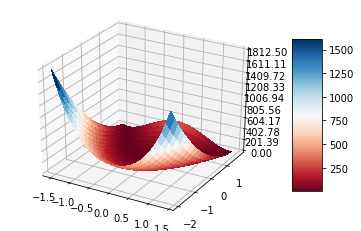

In [151]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

# Rosenbrock function
def f(x,y):
    return (1 - x)**2 + 100*(y - x**2)**2 

# (X,Y) grid on [-5,5]
x = arange(-1.5, 1.5, 0.1)
y = arange(-2, 2, 0.2)
X, Y = meshgrid(x, y)

# z = x^2 + y^2
Z = f(X,Y) 

# Plot (X,Y) in 3D
fig = figure(1)
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink = 0.7, aspect=5)
show()

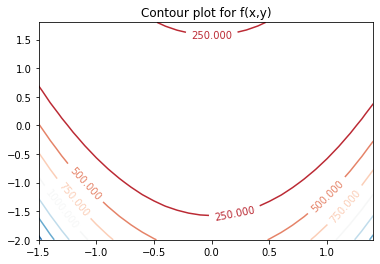

In [152]:
def contour_plot(x_seq,y_seq, x1):

    # Contour plots for f(x,y)
    figure(1)
    CS = contour(X, Y, Z, cmap=cm.RdBu)
    clabel(CS, inline=1, fontsize=10)
    
    # Initial point
    plot(x1[0],x1[1],'ro')
    
    # Sequence of points from gradient descent itterations
    plot(x_seq,y_seq,'ro')
    title('Contour plot for f(x,y)')
    show()

# Contour plot with no points
contour_plot([],[],[[],[]])

In [153]:

# df/dx = 2x
def dfdx(x,y):
    return -400*x*y + 400*x**3 + 2*x -2

# df/dy = 2y
def dfdy(x,y):
    return 200*y -200*x**2

# Gradient vector [df/dx, df/dy]
def grad_vector(x,y):
    return np.array([dfdx(x,y), dfdy(x,y)])

In [154]:
def grad_descent_mult(df,x_prev,learn_rate):
    
    # Epsilon threshold 
    epsilon = 0.0001
    
    # Itterations number
    grad_itter = 1
    
    # Save itteration 
    seq_x = []
    seq_y = []

    # First itteration of gradient descent
    x_next = np.subtract(x_prev, learn_rate*df(x_prev[0],x_prev[1]))
    
    # Save starting itteration
    seq_x = np.append(seq_x, x_next[0])
    seq_y = np.append(seq_y, x_next[1])
    
    # Itterate until abs(x_{t+1} - x_{t}) < epsilon
    # abs(x_{t+1} - x_{t}) is defined as euclidean distance 
    while np.linalg.norm(np.subtract(x_next,x_prev)) > epsilon:
        
        # Update x_{t}
        x_prev = x_next

        # Gradient descent step
        # Set new x_{t+1} = x_{t} - lambda*[df/dx df/dy]
        x_next = x_prev - learn_rate*df(x_prev[0],x_prev[1])
        
        # Increment itteration
        grad_itter += 1
        
        # Update sequence of itterations
        seq_x = np.append(seq_x, x_next[0])
        seq_y = np.append(seq_y, x_next[1])
    
    # gradient descent output
    return (x_next, grad_itter, seq_x,seq_y)

Minimum (x,y) from gradient descent: [nan inf]
Number of gradient descent itterations: 6


C:\Users\Haixiang\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Haixiang\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Haixiang\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in double_scalars
  import sys


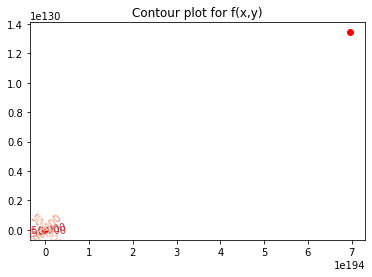

In [155]:
# Gradient desecent with x1 = [1.5,1.5] and learn rate lambda = 0.2
grad_output = grad_descent_mult(grad_vector, np.array([1,2]), 0.1)

# Print gradient descent solution
print('Minimum (x,y) from gradient descent: %s' %grad_output[0])
print('Number of gradient descent itterations: %s' %grad_output[1])

contour_plot(grad_output[2],grad_output[3], np.array([1,2]))

In [148]:
grad_output[3]

array([-3.80000000e+001,  2.63922000e+005,  7.31417361e+016,
        1.56514935e+051,  1.53365384e+154,              inf])

In [132]:
grad_output[0]

array([nan, inf])